In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit

In [3]:
path = "/work/cms16/sb95/Polymer_collapse_RW_init_rcut_0.8/"
rg = {}
kavals=[]
chivals=[]
ecutvals=[]
Nvals=[]
for dir in os.listdir(path):
    if 'output' in dir:
        try:
            ka=float(dir.split('ka')[1].split('_')[0])
            chi=float(dir.split('chi')[1].split('_')[0])
            ecut=float(dir.split('ecut')[1].split('_')[0])
            Np=float(dir.split("N")[1].split("_")[0])
            # print(dir, ka, ecut, chi)
            # print(os.path.join(path, dir, f"RG_{Np}_{ka:.2f}_{ecut:.2f}_{chi:.2f}.txt"))
            rgval=np.loadtxt(os.path.join(path, dir, f"RG_{Np:.0f}_{ka:.2f}_{ecut:.2f}_{chi:.2f}.txt"))
            # print(dir)
        except(FileNotFoundError): 
            print(dir)
            rgval=np.array([0.0])
            pass
        
        rg[f"{Np}_{ka:.2f}_{chi:.2f}_{ecut:.2f}"] = rgval
        kavals.append(ka)
        chivals.append(chi)
        Nvals.append(Np)
        
        ecutvals.append(ecut)
        
chivals=np.unique(chivals)
Nvals=np.unique(Nvals)


# list(rg.keys())

output_N5000_ka100.0_chi0.0_ecut0.0
output_N2000_ka0.0_chi-0.4_ecut8.0
output_N100_ka100.0_chi-0.6_ecut8.0
output_N1000_ka0.0_chi-0.2_ecut0.0
output_N200_ka100.0_chi-0.05_ecut0.0
output_N500_ka100.0_chi-0.4_ecut0.0
output_N100_ka200.0_chi-0.2_ecut8.0
output_N800_ka5.0_chi0.0_ecut8.0
output_N100_ka20.0_chi-0.2_ecut8.0
output_N100_ka5.0_chi-0.6_ecut0.0


In [31]:
len(list(rg.keys()))


630

In [19]:
# def fit_fn(x, a, ):

#     return a * np.sqrt(x)

def fit_fn(x, a, b):
    return a * x ** b
    # return a * (1 - np.exp(-b * x)) + c

0.0 [0.46912176 0.48495431]
4.0 [1.94241212 0.31351841]


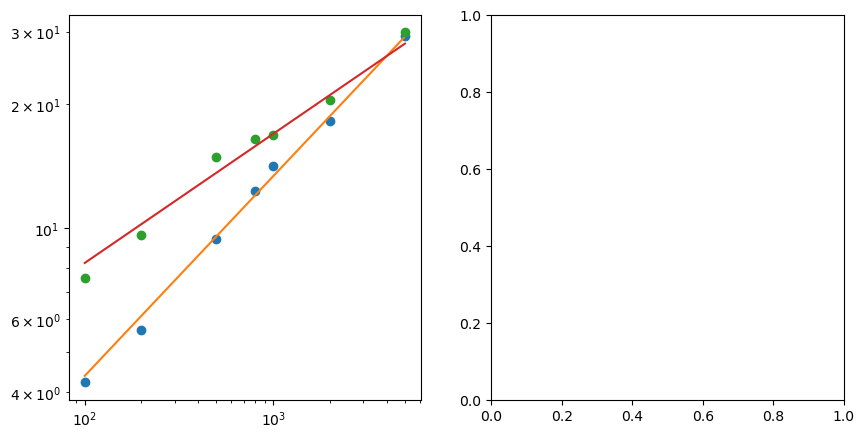

In [20]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

ka=0.0
chi=0.0

for ecut in [0.0, 4.0]:
        
    Rg_N = np.array([rg[f'{Np:.1f}_{ka:.2f}_{chi:.2f}_{ecut:.2f}'].mean() for Np in Nvals])
    ax[0].plot(np.unique(Nvals), Rg_N,'o', label=f"E0={ecut:.2f}")

    popt, pcov = curve_fit(fit_fn,Nvals[:-1], Rg_N[:-1])
    print(ecut, popt)
    ax[0].plot(np.unique(Nvals), fit_fn(np.unique(Nvals), *popt), )
ax[0].set_xscale('log')
ax[0].set_yscale('log')

-0.6
[0.46231784 0.48715978 1.        ]
-0.4
[0.46231784 0.48715978 1.        ]
-0.2
[0.46231784 0.48715978 1.        ]
-0.1
[0.46231784 0.48715978 1.        ]
-0.05
[0.46231784 0.48715978 1.        ]
0.0
[0.46231784 0.48715978 1.        ]


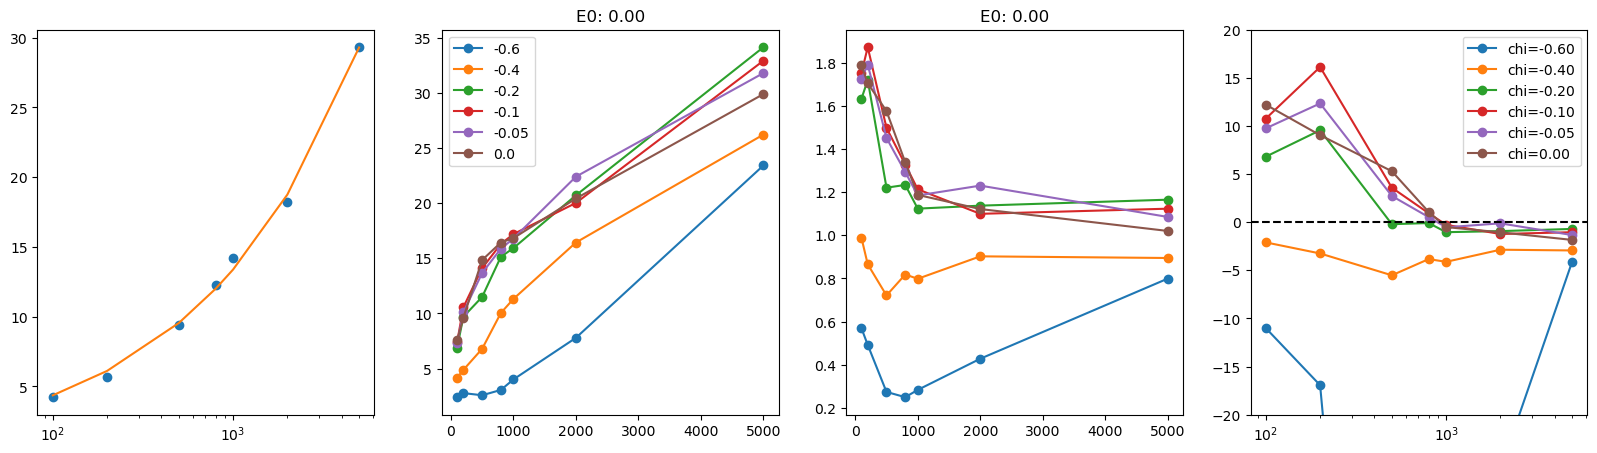

In [8]:
fig, ax = plt.subplots(1,4, figsize=(20,5))

chivals=np.unique(chivals)
Nvals=np.unique(Nvals)
# print(chivals, Nvals,np.unique(chivals))
for ka in [0.0]:
    for ecut in [0.0]:
        for chi in [0.0]:
            Rg_N = np.array([rg[f'{Np:.1f}_{ka:.2f}_{chi:.2f}_{ecut:.2f}'].mean() for Np in np.unique(Nvals)])
            ax[0].plot(np.unique(Nvals), Rg_N,'o', label=f"E0={ecut:.2f}")
           
            popt, pcov = curve_fit(fit_fn,np.unique(Nvals), Rg_N)
            # print(popt)
            ax[0].plot(np.unique(Nvals), fit_fn(np.unique(Nvals), *popt), )
            
for ka in [0.0]:
    for ecut in [0.0]:
        for Np in np.unique(Nvals):
            rg_chi=np.array([rg[f'{Np:.1f}_{ka:.2f}_{chi:.2f}_{ecut:.2f}'].mean() for chi in np.unique(chivals)])
            # ax[1].plot(np.unique(chivals), rg_chi, '.-',label=f"N={Np:.2f}")
            # ax[2].plot(np.unique(chivals), rg_chi/fit_fn(np.unique(Np), *popt),'.-', label=f"N={Np:.2f}")

for chi in chivals:
    print(chi)
    if chi!=10:
        rgchi=[rg[f'{Np:.1f}_{0.0:.2f}_{chi:.2f}_{4.0:.2f}'].mean() for Np in Nvals]
        ax[1].plot(Nvals, rgchi, 'o-',label=chi)
    
    alphaN=np.array([rg[f'{Np:.1f}_{0.0:.2f}_{chi:.2f}_{4.0:.2f}'].mean()/rg[f'{Np:.1f}_{0.0:.2f}_{0.0:.2f}_{0.0:.2f}'].mean() for Np in Nvals])
    ax[2].plot(Nvals, alphaN,'o-')
    
    # popt, pcov = curve_fit(fit_fn,np.unique(Nvals), alphaN,maxfev=10000)
    
    # ax[2].plot(np.unique(Nvals), fit_fn(Nvals, *popt), )
    
    scaling=alphaN**5-alphaN**3-2/alphaN**3
    ax[3].plot(Nvals, scaling,'o-', label=f'chi={chi:.2f}')
    # popt, pcov = curve_fit(fit_fn,Nvals, scaling,maxfev=10000)
    # ax[3].plot(np.sqrt(Nvals), fit_fn(Nvals, *popt), )
    print(popt)
ax[1].set_title(f'E0: {ecut:.2f}')
ax[2].set_title(f'E0: {ecut:.2f}')
ax[1].legend()
# ax[2].legend()
ax[0].set_xscale('log')
# ax[2].set_yscale('log')
# ax[1].set_ylim(0.4,1)
ax[3].set_xscale('log')
ax[3].set_ylim(-20,20)
ax[3].axhline(0,c='k',ls='--')
ax[3].legend()
# ax[3].set_ylim(-1e3,10)

[0.58906082 0.23997281 0.99639073]


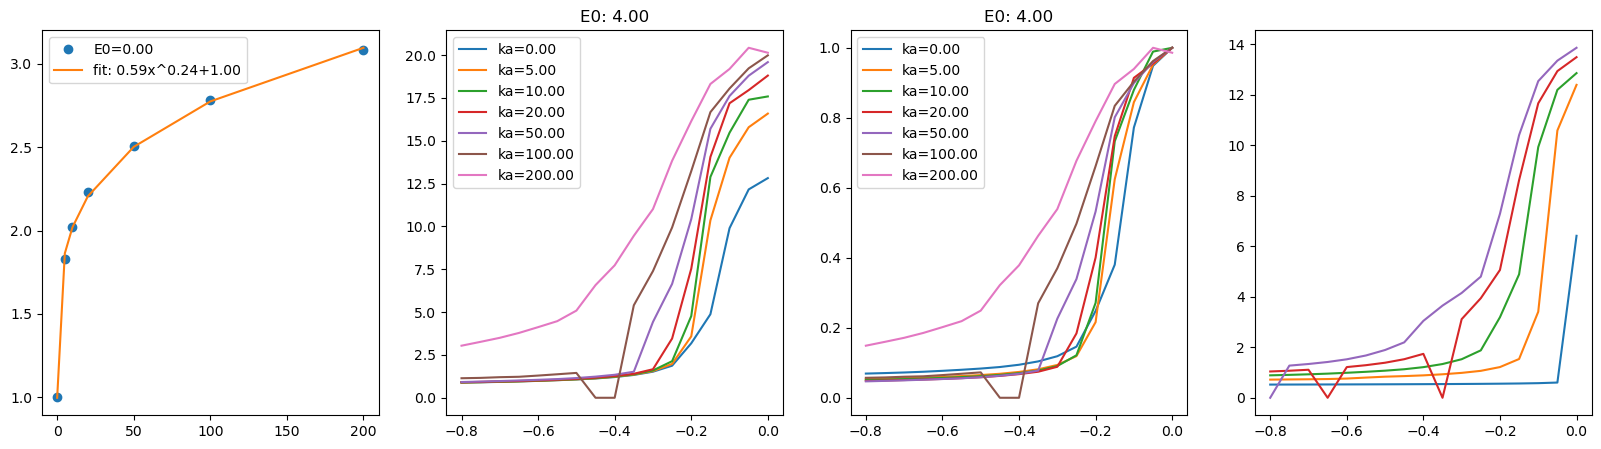

In [ ]:


for ecut in np.unique(ecutvals):
    for ka in [0.0,]:
        ax[3].plot(np.unique(chivals), [rg[f'{ka:.2f}_{xx:.2f}_{ecut:.2f}'].mean()/fit_fn(ka, *popt) for xx in np.unique(chivals)], label=f"E0={ecut:.2f}")
ax[2].legend()
ax[1].legend()
ax[0].legend()

In [ ]:
def U_ev(r, E0=4.0, mu=5.0, rc=0.5):
    return 0.5 * E0 * (1 + np.tanh(mu*(rc-r)))

def f_contact(r, mu=2.0, rc=1.5):
    return 0.5 * (1 + np.tanh(mu*(rc-r)))

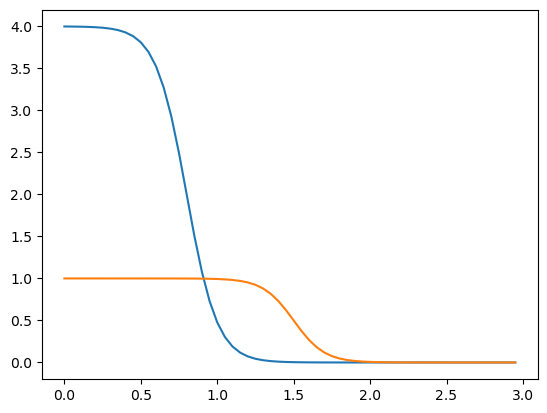

In [181]:
r=np.arange(0,3.0, 0.05)
plt.plot(r, U_ev(r,rc=0.8, ))
plt.plot(r, f_contact(r,rc=1.5,mu=5.0,))
